In [31]:
%load_ext autoreload
%autoreload 2
import numpy as np
import toml
import pandas as pd
import cv2
import sys
sys
from utils import utils
import matplotlib.pyplot as plt
import imageio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
annotations_path = "/Users/mustafashaikh/3d-gui/test_videos/single_frame_annotations.csv"
calib_data_path = "/Users/mustafashaikh/Documents/salk/3d/data/slap_2m/calibration.toml"
targets_path = "/Users/mustafashaikh/Documents/salk/3d/data/slap_2m/targets_data.npy"
orig_vid_path = ""

In [9]:
T = utils.compute_global_coordinate_frame(
    calib_data_path=calib_data_path,
    annotations_path=annotations_path
)

In [25]:
T

array([[ 9.88192237e-01,  1.43182941e-01,  5.45412469e-02,
        -2.31004706e+02],
       [-1.25733281e-01,  9.61235884e-01, -2.45390946e-01,
         2.36323388e+02],
       [-8.75628010e-02,  2.35635778e-01,  9.67888700e-01,
         1.17447363e+03]])

In [16]:
targets = np.load(targets_path)

(956.6866914457355, 1436.7468731384197)

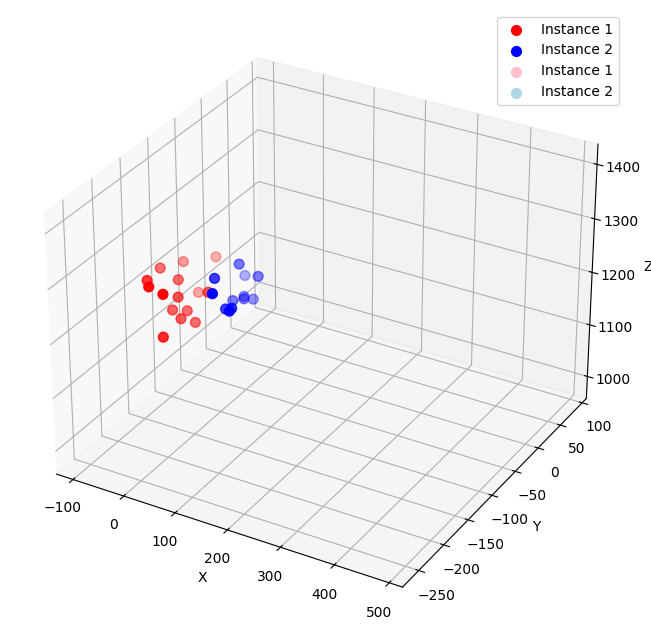

In [ ]:
frame_idx = 0
maxs = np.nanmax(targets, axis=(0,1,2))
mins = np.nanmin(targets, axis=(0,1,2))
xmin,xmax,ymin,ymax,zmin,zmax = mins[0],maxs[0],mins[1],maxs[1],mins[2],maxs[2]
colors = ['red', 'blue', 'pink', 'lightblue']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(targets[frame_idx].shape[0]):
    keypoints = targets[frame_idx][i]  # Shape: (15, 3)
    x, y, z = keypoints[:, 0], keypoints[:, 1], keypoints[:, 2]
    ax.scatter(x, y, z, c=colors[i % len(colors)], s=50, label=f'Instance {i+1}')

for i in range(targets[frame_idx].shape[0]):
    keypoints = targets[frame_idx][i]  # Shape: (15, 3)
    # register to global frame
    keypoints_h = np.hstack((keypoints, np.ones((keypoints.shape[0], 1))))
    keypoints_h_global = T @ keypoints_h.T
    keypoints_global = keypoints_h_global[:3, :].T
    x, y, z = keypoints_global[:, 0], keypoints_global[:, 1], keypoints_global[:, 2]
    ax.scatter(x, y, z, c=colors[i % len(colors)+2], s=50, label=f'Instance {i+1}')

# overlay the original frame


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title(f'Frame {(frame_idx+1) // n_cams}')
ax.legend()   
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)

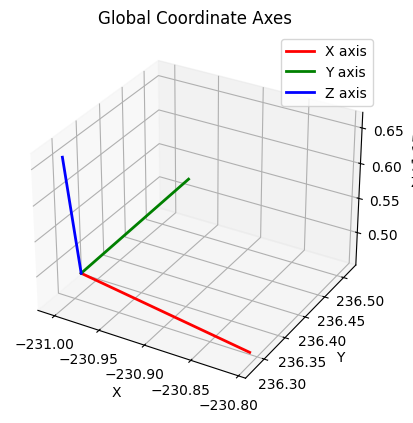

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the origin
origin = t

# Draw the axes as lines: each column of R is a direction vector
axis_length = 0.2  # adjust as needed for visualization

# X axis (red) - draw as a line
x_end = origin + axis_length * R[:, 0]
ax.plot([origin[0], x_end[0]], [origin[1], x_end[1]], [origin[2], x_end[2]], 
        color='r', linewidth=2, label='X axis')

# Y axis (green) - draw as a line  
y_end = origin + axis_length * R[:, 1]
ax.plot([origin[0], y_end[0]], [origin[1], y_end[1]], [origin[2], y_end[2]], 
        color='g', linewidth=2, label='Y axis')

# Z axis (blue) - draw as a line
z_end = origin + axis_length * R[:, 2]
ax.plot([origin[0], z_end[0]], [origin[1], z_end[1]], [origin[2], z_end[2]], 
        color='b', linewidth=2, label='Z axis')

# Optionally, plot the triangulated points for context
# ax.scatter(pts_3d[:, 0], pts_3d[:, 1], pts_3d[:, 2], c='k', s=10, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Global Coordinate Axes')
ax.legend()
plt.show()